<a href="https://colab.research.google.com/github/acrisandradee/Algoritmos-IA-para-classificacao-/blob/main/PDAlgoritmos_IA_para_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça o módulo do Kaggle Intro to Machine Learning:https://www.kaggle.com/learn/intro-to-machine-learning

Comprove a finalização do módulo com um print que contenha data e identificação do aluno.



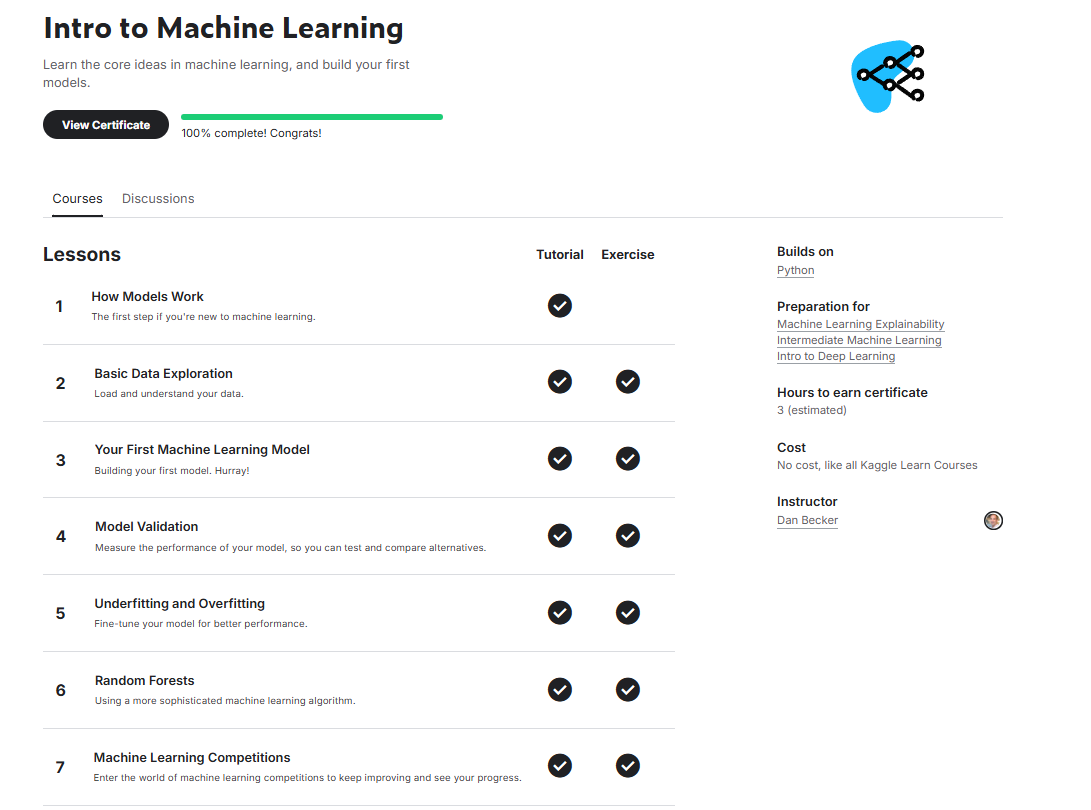

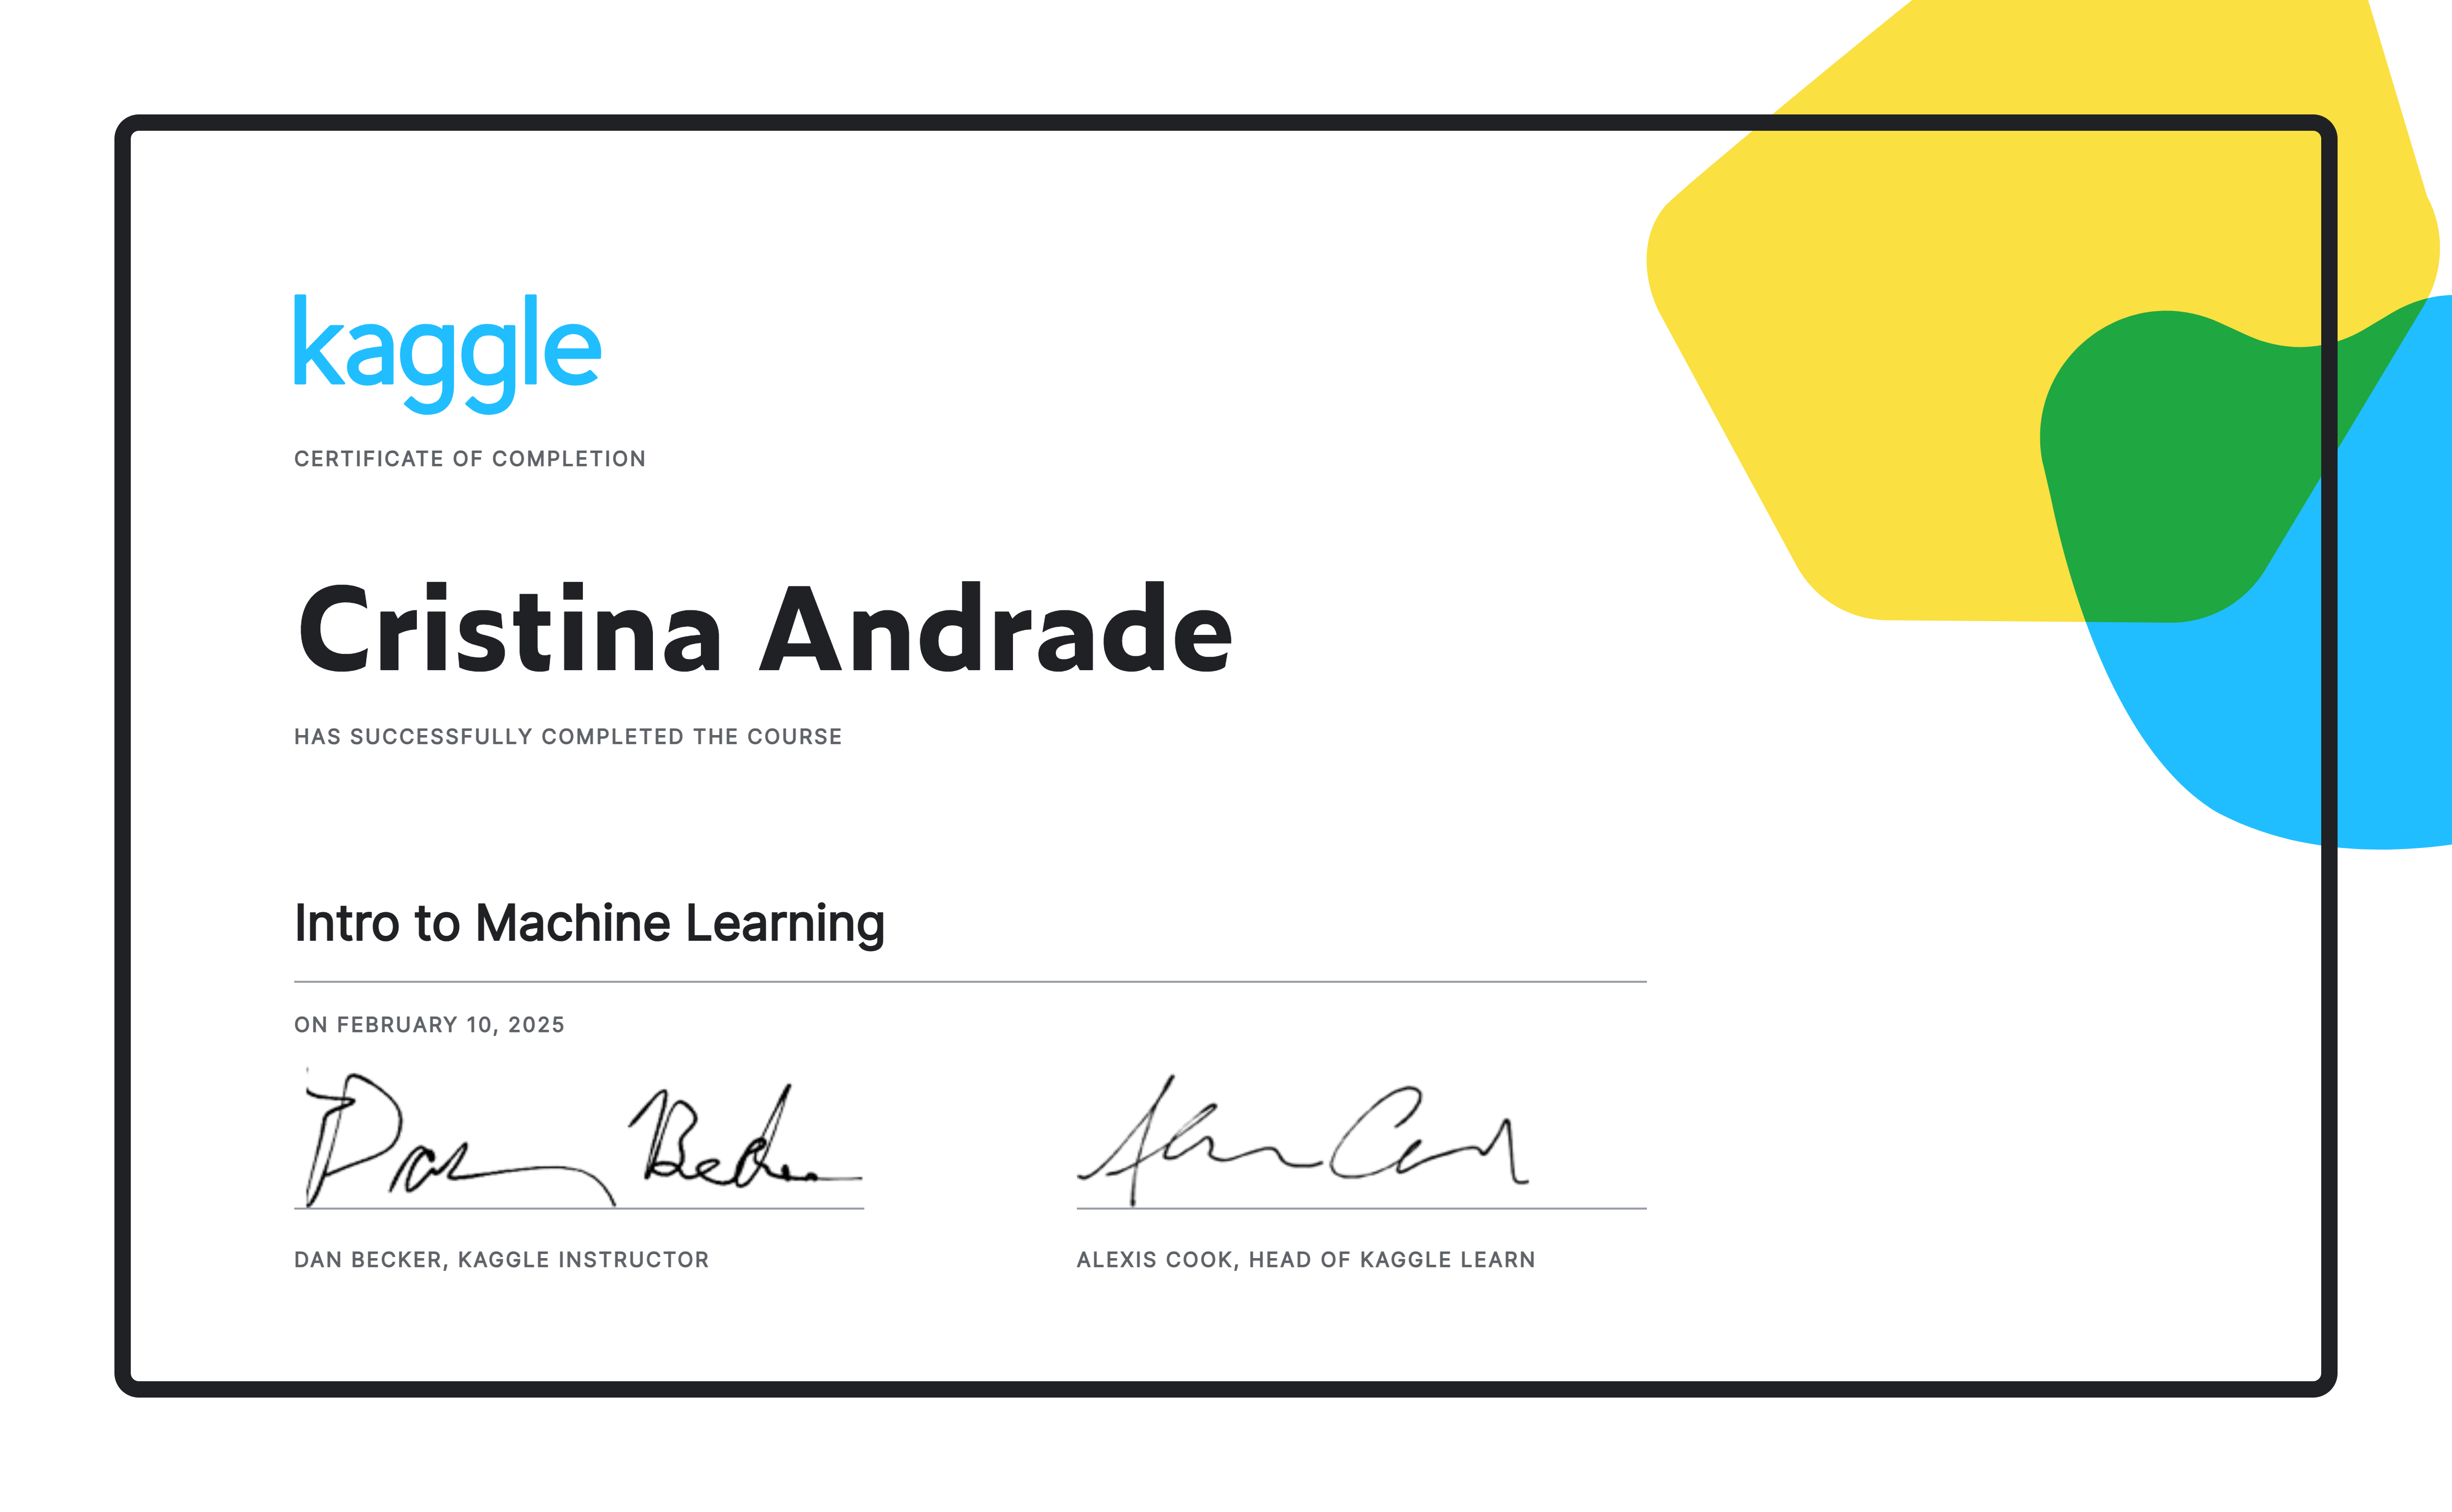



---



Trabalho com base:

Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle:
https://www.kaggle.com/datasets/rajyellow46/wine-quality

> 2. Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
:

In [74]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('/content/drive/MyDrive/Algoritmos IA para classificação/winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [75]:
df['opinion'] = (df['quality'] > 5).astype(int)
df.drop(columns=['quality'], inplace=True)

print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  opinion  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.4



---



> 3. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

In [76]:
print(f"As variaveis e tipos presentes no dataset sao: \n {df.dtypes}")

As variaveis e tipos presentes no dataset sao: 
 type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
opinion                   int64
dtype: object


In [77]:
discretas = []
categoricas = []
continuas = []

for col in df.columns:
    if df[col].dtype == 'object':  #Categoricas sao as do tipo object ou category e representam categorias ou rótulos.
        categoricas.append(col)
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':  # Variáveis numéricas
        # Verificar se a variável é contínua ou discreta
        if len(df[col].unique()) > 10:  # Se tiver mais de 10 valores únicos, é contínua.  são do tipo float ou int e contêm valores numéricos contínuos
            continuas.append(col)
        else:  # se nao ela e discret no caso, são do tipo int e representam contagens ou números inteiros limitados
            discretas.append(col)

print("Variáveis discretas:", discretas)
print("Variáveis categóricas:", categoricas)
print("Variáveis contínuas:", continuas)

Variáveis discretas: ['opinion']
Variáveis categóricas: ['type']
Variáveis contínuas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [78]:
df_numerico = df.select_dtypes(include=['int64', 'float64'])

medias = df_numerico.mean()
desvios = df_numerico.std()

resultado = pd.DataFrame({'Média': medias, 'Desvio Padrão': desvios})
print(resultado)


                           Média  Desvio Padrão
fixed acidity           7.216579       1.296750
volatile acidity        0.339691       0.164649
citric acid             0.318722       0.145265
residual sugar          5.444326       4.758125
chlorides               0.056042       0.035036
free sulfur dioxide    30.525319      17.749400
total sulfur dioxide  115.744574      56.521855
density                 0.994697       0.002999
pH                      3.218395       0.160748
sulphates               0.531215       0.148814
alcohol                10.491801       1.192712
opinion                 0.633061       0.482007




---



>4. Com a base escolhida:

a. Descreva as etapas necessárias para criar um modelo de classificação eficiente.

**Etapa inicial: coleta e processamento de dados**

> importamos nossa base de dados e analisamos os dados como tipos de variaveis, e se houver valores nulos faremos o tratamento, transformamos dados categoricos em numericos se houcver. e ai sim aplicamos a normalização ou padronização.

**Separação dos dados**
> Separamos os dados em treino e teste, ondegeralmente 80% dos dados são usados para treino e 20% para teste.

**Escolha do modelo e treinamento**
> Nesta etapa testamos diferentes algoritimos. Regressão logistica caso os dados forem linear e se nao forem lineares, podemos usar a àrvore de decisao. e kn ou  redes neurais se o dataset for mais complexo.

**Otimização e ajuste**

> Apos avaliar, caso seja necessário realizamos ajuste ou otimização do modelo. temos ferramentas como Grid Search, Random Search para encontrar os melhores parâmetros para o modelo.

**Avaliação do modelo**

> Apos obtermos o resultado, avaliamos nosso modelo usamos metricas como precisão,acuracia, matriz de confusão e outras.

**Teste e validação final**

> Com nosso modelo pronto e refinado, fazemos e teste final e se tudo ocorrer bem, validamos e implementamos.






---



b. Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

In [119]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Verificar se há valores NaN e remover
df = df.dropna()

# Converter a variável categórica 'type' para valores numéricos
df["type"] = LabelEncoder().fit_transform(df["type"])  # 0 = white, 1 = red



X = df.drop(columns=["opinion"])
y = df["opinion"]

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Padronização
    ("logreg", LogisticRegression(random_state=42, max_iter=1000))  # Modelo
])

# Criar validação cruzada estratificada (k=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

> i. a média e desvio da acurácia dos modelos obtidos;

In [80]:

# Calcular acurácia em cada fold
accuracy_scores = cross_val_score(pipeline, X, y, cv=kf)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Média da acurácia: {mean_accuracy}")
print(f"Desvio padrão da acurácia: {std_accuracy}")

Média da acurácia: 0.742690244567688
Desvio padrão da acurácia: 0.013185299710734136


> ii. a média e desvio da precisão dos modelos obtidos;

In [81]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score

y_pred = cross_val_predict(pipeline, X, y, cv=kf)

precision = precision_score(y, y_pred)

mean_precision = np.mean(precision)
std_precision = np.std(precision)


print(f"Média da precisão: { mean_precision}")
print(f"Desvio  desvio da precisão: {std_precision}")

Média da precisão: 0.7709821428571428
Desvio  desvio da precisão: 0.0


> iii. a média e desvio da recall dos modelos obtidos;

In [82]:
from sklearn.metrics import make_scorer, recall_score, f1_score

# Criar os scorers para recall e f1-score
recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)

# Calcular recall em cada fold
recall_scores = cross_val_score(pipeline, X, y, cv=kf, scoring=recall_scorer)

mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_recall, std_recall

(0.8442972150992902, 0.01674794554771446)

> iv. a média e desvio do f1-score dos modelos obtidos.

In [83]:
f1_scores = cross_val_score(pipeline, X, y, cv=kf, scoring=f1_scorer)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

mean_f1, std_f1

(0.8059274052042827, 0.01060799474836664)

In [85]:
from sklearn.metrics import classification_report

y_pred = cross_val_predict(pipeline, X, y, cv=kf)

# Analisar métricas de classificação
classification_metrics = classification_report(y, y_pred)

# Exibir o relatório de classificação
print("\nRelatório de Classificação usando validação cruzada:")
print(classification_metrics)


Relatório de Classificação usando validação cruzada:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62      2372
           1       0.77      0.84      0.81      4091

    accuracy                           0.74      6463
   macro avg       0.72      0.71      0.71      6463
weighted avg       0.74      0.74      0.74      6463



c. Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

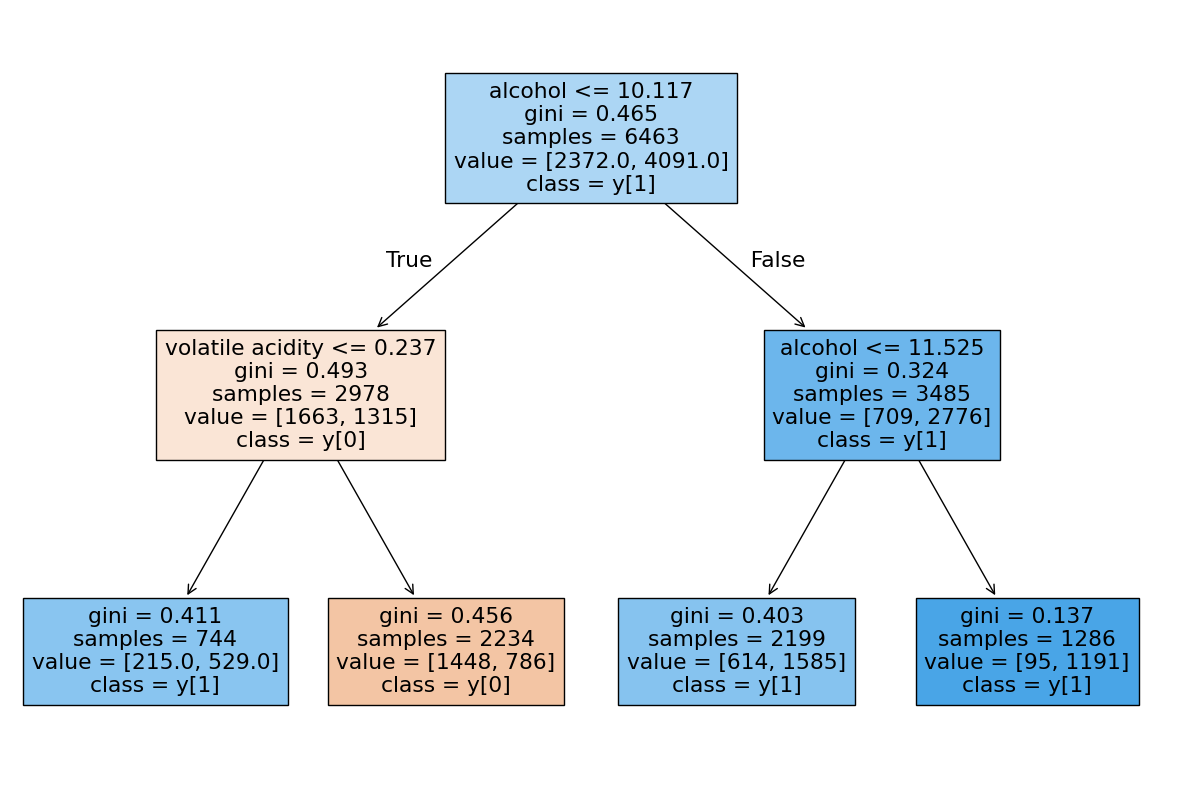

In [108]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


X = df.drop(columns=["opinion"])
y = df["opinion"]

modelo_arvore = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.01, random_state=42)



kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

modelo_arvore.fit(X, y)

# Plota a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=True)
plt.show()



> i. a média e desvio da acurácia dos modelos obtidos;

In [91]:
accuracy_scores_arvore = cross_val_score(modelo_arvore, X, y, cv=kf, scoring="accuracy")

mean_accuracy_arvore = np.mean(accuracy_scores_arvore)
std_accuracy_arvore = np.std(accuracy_scores_arvore)

mean_accuracy_arvore, std_accuracy_arvore

(0.7901914528114997, 0.012821579987501108)

> ii. a média e desvio da precisão dos modelos obtidos;

In [93]:
from sklearn.metrics import precision_score

precision_scorer = make_scorer(precision_score)

precision_scores_arvore = cross_val_score(modelo_arvore, X, y, cv=kf, scoring=precision_scorer)

mean_precision_arvore = np.mean(precision_scores_arvore)
std_precision_arvore = np.std(precision_scores_arvore)

mean_precision_arvore, std_precision_arvore

(0.8391937955463808, 0.01220479530587493)

> iii. a média e desvio da recall dos modelos obtidos;

In [94]:
from sklearn.metrics import recall_score

recall_scorer = make_scorer(recall_score)

recall_scores_arvore = cross_val_score(modelo_arvore, X, y, cv=kf, scoring=recall_scorer)

mean_recall_arvore = np.mean(recall_scores_arvore)
std_recall_arvore = np.std(recall_scores_arvore)

mean_recall_arvore, std_recall_arvore

(0.8271811079968991, 0.012184904098349542)

> iv. a média e desvio do f1-score dos modelos obtidos.

In [96]:
from sklearn.metrics import make_scorer, f1_score

f1_scores_arvore = cross_val_score(modelo_arvore, X, y, cv=kf, scoring=make_scorer(f1_score))

# Média e desvio padrão do F1-score
mean_f1_arvore = np.mean(f1_scores_arvore)
std_f1_arvore = np.std(f1_scores_arvore)

mean_f1_arvore, std_f1_arvore

(0.8330875952109492, 0.010060742376380615)

d. Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

In [117]:
from sklearn.svm import SVC

X = df.drop(columns=["opinion"])
y = df["opinion"]

# Inicializa o modelo SVM com um kernel radial (RBF)
modelo_svm = SVC(kernel='linear', C=1, random_state=42)

# Configura a validação cruzada estratificada
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


> i. a média e desvio da acurácia dos modelos obtidos;

In [118]:
scores = cross_val_score(modelo_svm, X, y, cv=kf, scoring='accuracy')

print(f"Média da acurácia: {scores.mean():.4f}")
print(f"Desvio padrão da acurácia: {scores.std():.4f}")

Média da acurácia: 0.7506
Desvio padrão da acurácia: 0.0111


> ii. a média e desvio da precisão dos modelos obtidos;

> iii. a média e desvio da recall dos modelos obtidos;

> iv. a média e desvio do f1-score dos modelos obtidos.

> 5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

> 6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

> 7. Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório